# Perkenalan

Kartu kredit adalah instrumen keuangan yang memungkinkan Anda meminjam uang dari pemberi pinjaman untuk melakukan pembelian atau menarik uang tunai. Ketika Anda menggunakan kartu kredit, Anda meminjam uang dari penerbit kartu dan diwajibkan untuk membayar kembali jumlah yang dipinjam, ditambah dengan biaya bunga yang berlaku pada tanggal yang ditentukan.

Dengan memahami kelompok pelanggan secara lebih mendalam, perusahaan dapat menciptakan kampanye pemasaran yang lebih efisien dan mendapatkan pemahaman yang lebih baik tentang kebutuhan dan harapan pelanggan. Dengan cara ini, pengelompokan kartu kredit tidak hanya membantu meningkatkan efisiensi pemasaran, tetapi juga dapat memperkuat hubungan antara perusahaan dan pelanggan, seiring dengan memberikan penawaran produk dan layanan yang lebih sesuai dengan keinginan mereka.

Dalam upaya mengelompokkan atau melakukan clustering terhadap pengguna aktif kartu kredit, proyek ini akan menggunakan dataset "CC GENERAL.csv", yang mencakup informasi mengenai hal-hal yang berkaitan mengenai penggunaan kartu kredit seperti ID, Saldo, Frekuensi, Pembelian, Pembayaran, Minimal, Frekuensi pembayaran, limit kartu, dan tenor.

Metode Machine Learning, terutama algoritma K-Means Clustering, telah terbukti berhasil dalam meningkatkan efisiensi segmentasi data pada berbagai masalah pengelompokan. K-Means Clustering adalah sebuah algoritma yang bekerja dengan membagi dataset menjadi kelompok-kelompok homogen berdasarkan kemiripan atribut. Dengan menggunakan pendekatan iteratif, algoritma ini memaksimalkan kesamaan antaranggota dalam satu kelompok sementara meminimalkan perbedaan antarkelompok. K-Means Clustering memiliki keunggulan dalam menangani dataset yang besar dan kompleks dengan menentukan pusat kelompok secara iteratif. Ini memungkinkan identifikasi pola tersembunyi dalam data yang mungkin sulit ditemukan secara manual. Dengan menyesuaikan diri terhadap distribusi data yang sebenarnya, algoritma K-Means Clustering dapat memberikan hasil segmentasi yang lebih akurat dan relevan.

Proyek ini bertujuan untuk Melakukan Clustering atau pengelompokan dari pengguna aktif kartu kredit berdasarkan kebiasaan yang dilakukan berdasarkan dataset. Dengan memanfaatkan fitur-fitur yang tersedia yang relevan dari dataset, diharapkan hasil penelitian ini dapat memberikan wawasan yang berharga bagi para pelaku bisnis yang memiliki model perbankan atau mengeluarkan kartu kredit. Penerapan model machine learning pada proyek ini diharapkan dapat mendukung langkah-langkah untuk membantu meningkatkan kualitas perencanaan dan identifikasi klien yang tidak sehat bagi bisnis.

## Informasi Data

**Jumlah Data** <br/>
Jumlah data pada dataset ini terdiri dari 8950 baris dan 18 kolom.

**Kelas**<br/>
Dataset ini tidak memiliki fitur yang menunjukkann cluster tersendiri, sehingga akan dibuat 7 cluster berdasarkan dataset

**Sumber**<br/>
Dataset ini saya dapatkan dari Kaggle:<br/>
[link text](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data)

**Atribut Data**<br/>

1. **CUST_ID** :  Identifikasi pemegang kartu kredit (Kategoris)
2. **BALANCE** : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. **BALANCE_FREQUENCY** : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. **PURCHASES** : Jumlah pembelian yang dibuat dari akun
5. **ONEOFF_PURCHASES** : Jumlah pembelian maksimum yang dilakukan sekaligus
6. **INSTALLMENTS_PURCHASES** : Jumlah pembelian yang dilakukan dengan pembayaran angsuran
7. **CASH_ADVANCE** : Uang tunai yang diberikan oleh pengguna
8. **PURCHASES_FREQUENCY** : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. **ONEOFFPURCHASESFREQUENCY** : Seberapa sering Pembelian terjadi sekaligus (1 = sering dibeli, 0 = tidak sering dibeli)
10. **PURCHASESINSTALLMENTSFREQUENCY** : Seberapa sering pembelian dengan angsuran dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. **CASHADVANCEFREQUENCY** : Seberapa sering pembayaran tunai dimuka dilakukan
12. **CASHADVANCETRX** : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
13. **PURCHASES_TRX** : Jumlah transaksi pembelian yang dilakukan
14. **CREDIT_LIMIT** : Batas Kartu Kredit untuk pengguna
15. **PAYMENTS** : Jumlah pembayaran yang dilakukan oleh pengguna
16. **MINIMUM_PAYMENTS** : Jumlah pembayaran minimum yang dilakukan oleh pengguna
17. **PRCFULLPAYMENT** : Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. **TENURE** : Jangka waktu layanan kartu kredit untuk pengguna

**Objektifitas**

Adapun Objektif yang ingin dicapai:

*   Membangun model machine learning yang dapat melakukan clstering dari pengguna aktif kartu kredit
*   Menilai kinerja modek K-Means Clustering berdasarkan Seleksi fitur dalam 7 cluster.
*   Menganalisis Performa Model K-Means Clustering dalam melakukan pengelompokan menjadi 7 cluster

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from scipy.integrate import simps
from factor_analyzer import FactorAnalyzer,calculate_kmo,calculate_bartlett_sphericity
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from pickle import dump,load
pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["ggplot"])
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.columns = df.columns.str.lower()
df = df.drop("cust_id",axis=1)
df.head(10)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Dimensi Data**

In [3]:
df.shape

(8950, 17)

**Informasi Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

**Cek Data Duplikat**

In [5]:
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

<Axes: >

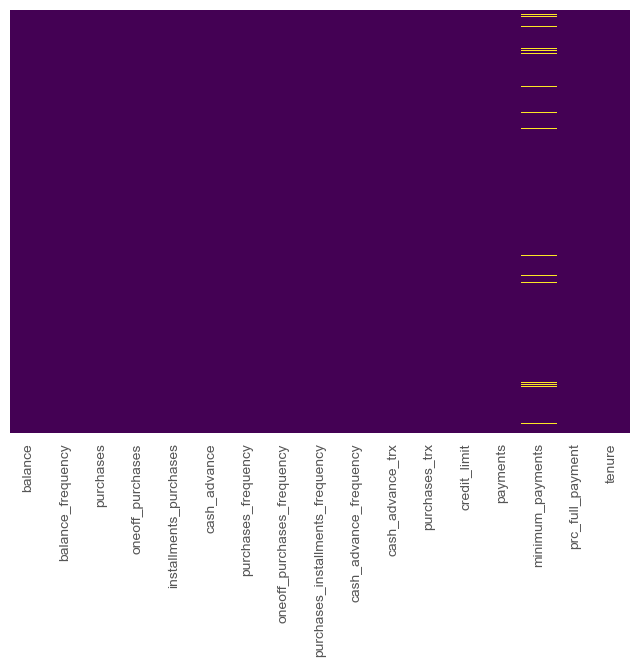

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Jika dilihat dari heatmap diatas dapat ditemukan missing values pada kolom minimum_payments, dan dari info didapat 1 missing values pada card_limit.

Karena Didapatkan Null vales dalam jumlah yang sedikit, maka hanya perlu menghilangkan baris yang mengandung null vales.

In [7]:
df = df.dropna()
df = df.reset_index(drop=True)

## Exploratory Data Analysis

### Statistik Deskriptif


In [8]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Mengecek Outlier**

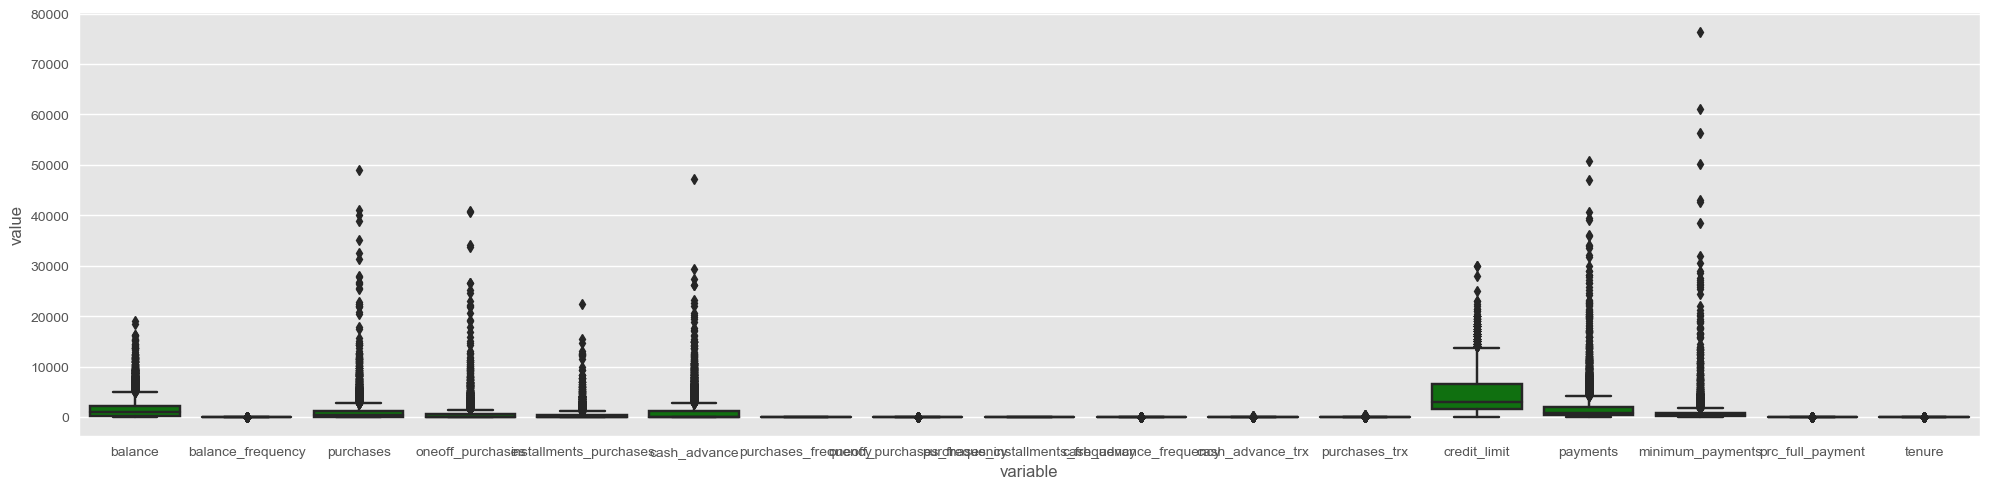

In [9]:
df1 = df.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x="variable",
            y="value",
            color='green',
            orient='v',
            data=pd.melt(df1),
            ax=ax)
plt.tight_layout()

Berdasarkan Boxplot, dapat diambil informasi bahwa terdapat cukup banyak outlier dalam dataset ini, namun outlier akan diabaikan karena nantinya akan berpengaruh besar terhadap kinerja model clustering.

### Data Query and Grouping

**Kontribusi Total Saldo**

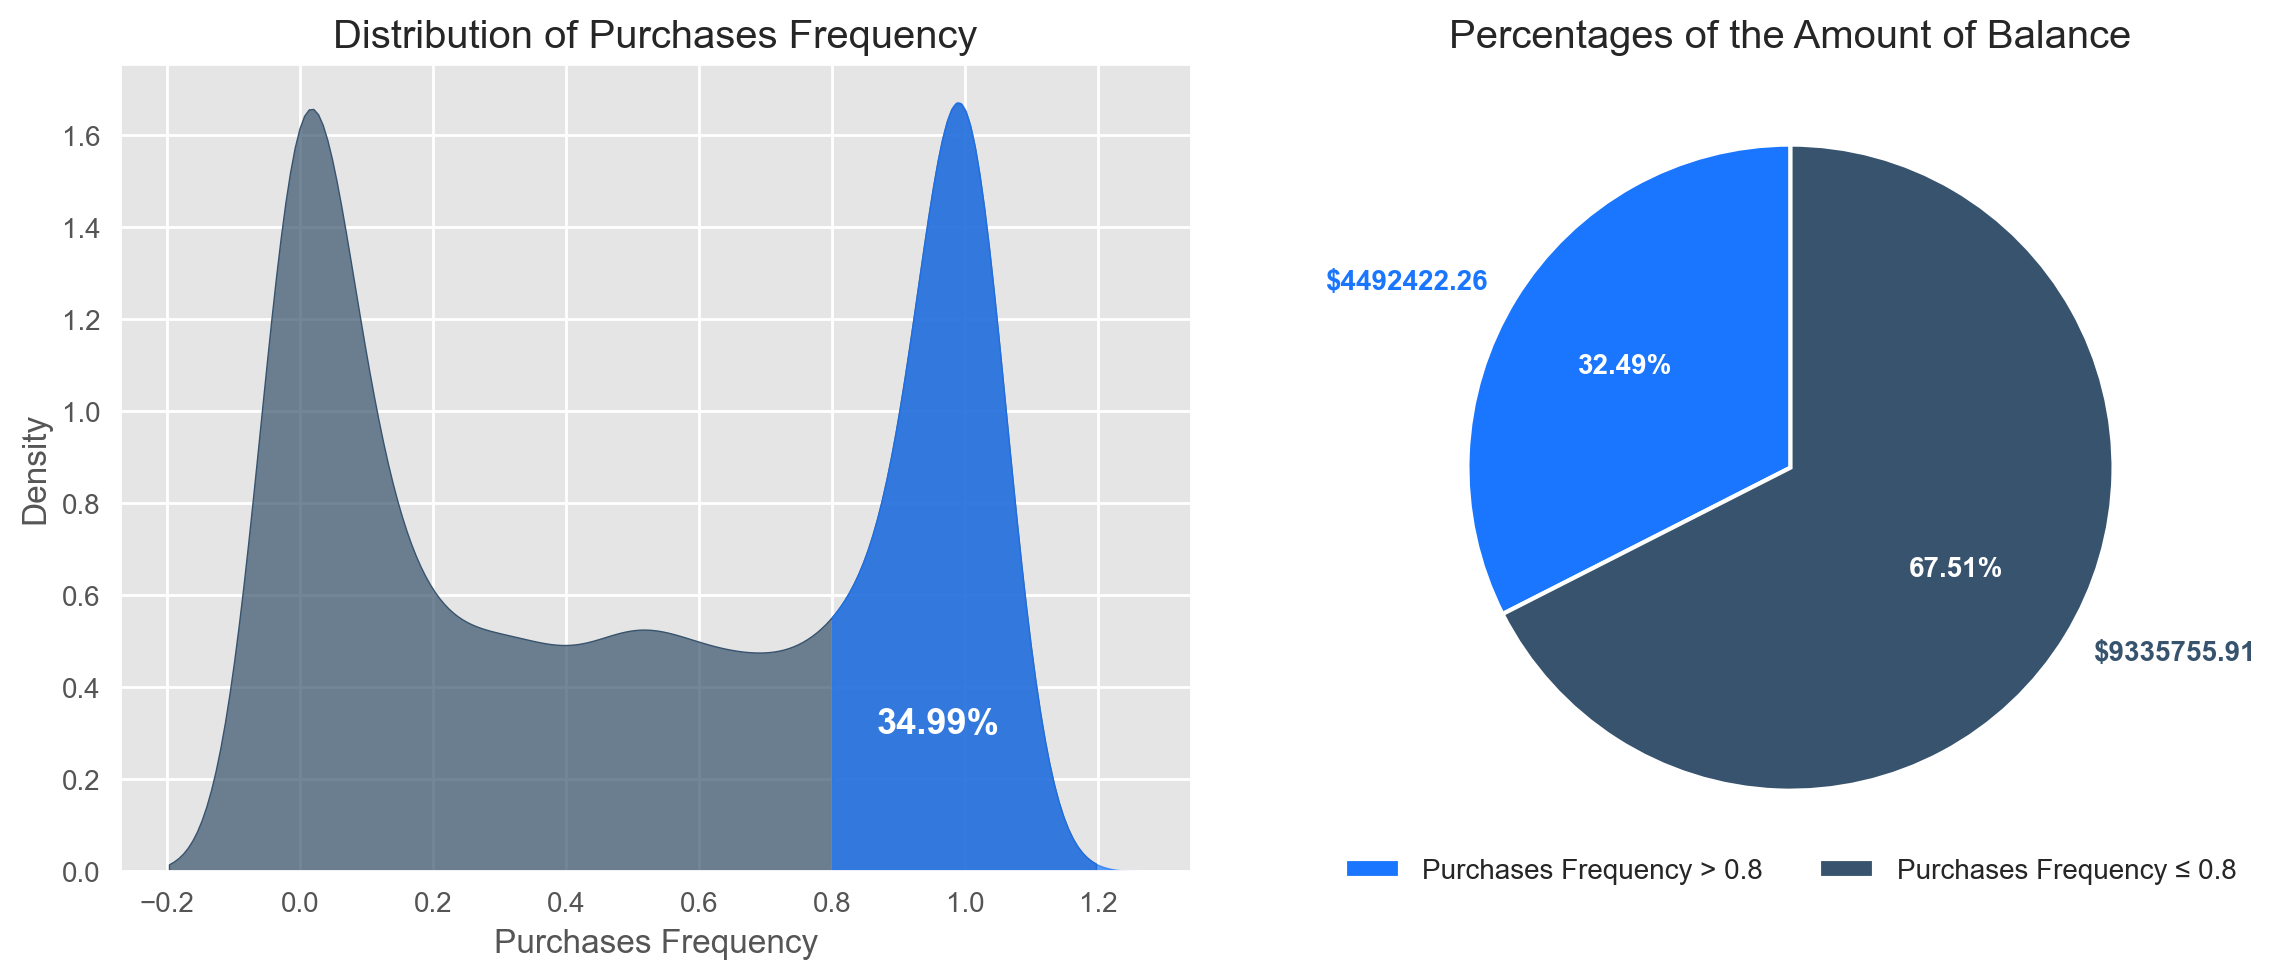

In [10]:
fig,ax = plt.subplots(1,2,figsize=(12,5),dpi=200)

kde_plot = sns.kdeplot(ax=ax[0],data=df,x="purchases_frequency",color="#37536d",fill=True,alpha=0.7)
xmin,xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["purchases_frequency"])
x = np.linspace(xmin,xmax,10_000)
kde_y = kde(x)
x0,y0 = [],[]
for i,j in zip(x,kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)
x0,y0 = np.array(x0),np.array(y0)
area0 = round(simps(y0,x0,dx=1) * 100,0)
kde_plot.fill_between(x=x0,y1=y0,color="#1a76ff",alpha=0.7)
ax[0].text(
    x=0.96,
    y=0.3,
    horizontalalignment="center",
    s=f"{round(len(df[df['purchases_frequency'] > 0.8]) / len(df) * 100,2)}%",
    color="white",
    fontweight="bold",
    fontsize=13
)
ax[0].set_title("Distribution of Purchases Frequency")
ax[0].set_xlabel("Purchases Frequency")

patches,texts,pcts = ax[1].pie(
    [df[df["purchases_frequency"] > 0.8]["balance"].sum(),df[df["purchases_frequency"] <= 0.8]["balance"].sum()],
    labels=[f'${round(df[df["purchases_frequency"] > 0.8]["balance"].sum(),2)}',f'${round(df[df["purchases_frequency"] <= 0.8]["balance"].sum(),2)}'],
    startangle=90,
    colors=["#1a76ff","#37536d"],
    autopct="%.2f%%",
    wedgeprops={"linewidth":1.5,"edgecolor":"white"}
)
ax[1].set_title("Percentages of the Amount of Balance")
ax[1].legend(patches,["Purchases Frequency > 0.8","Purchases Frequency ≤ 0.8"],ncol=2,bbox_to_anchor=(0.5,0),loc="center")
for index,patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())
plt.setp(pcts,color="white",fontweight="bold")
plt.setp(texts,fontweight="bold")

plt.tight_layout()
plt.show()

Total saldo pelanggan yang melakukan pembelian paling sering (Ambang batas ditetapkan dengan nilai 0,8) menyumbang sebanyak 32,49% dari total saldo seluruh pelanggan. sehingga menunjukkan adanya golongan yang berpengaruh cukup besar dalam keseluruhan total saldo seluruh pelanggan.

**Statistik Pembayaran Penuh**

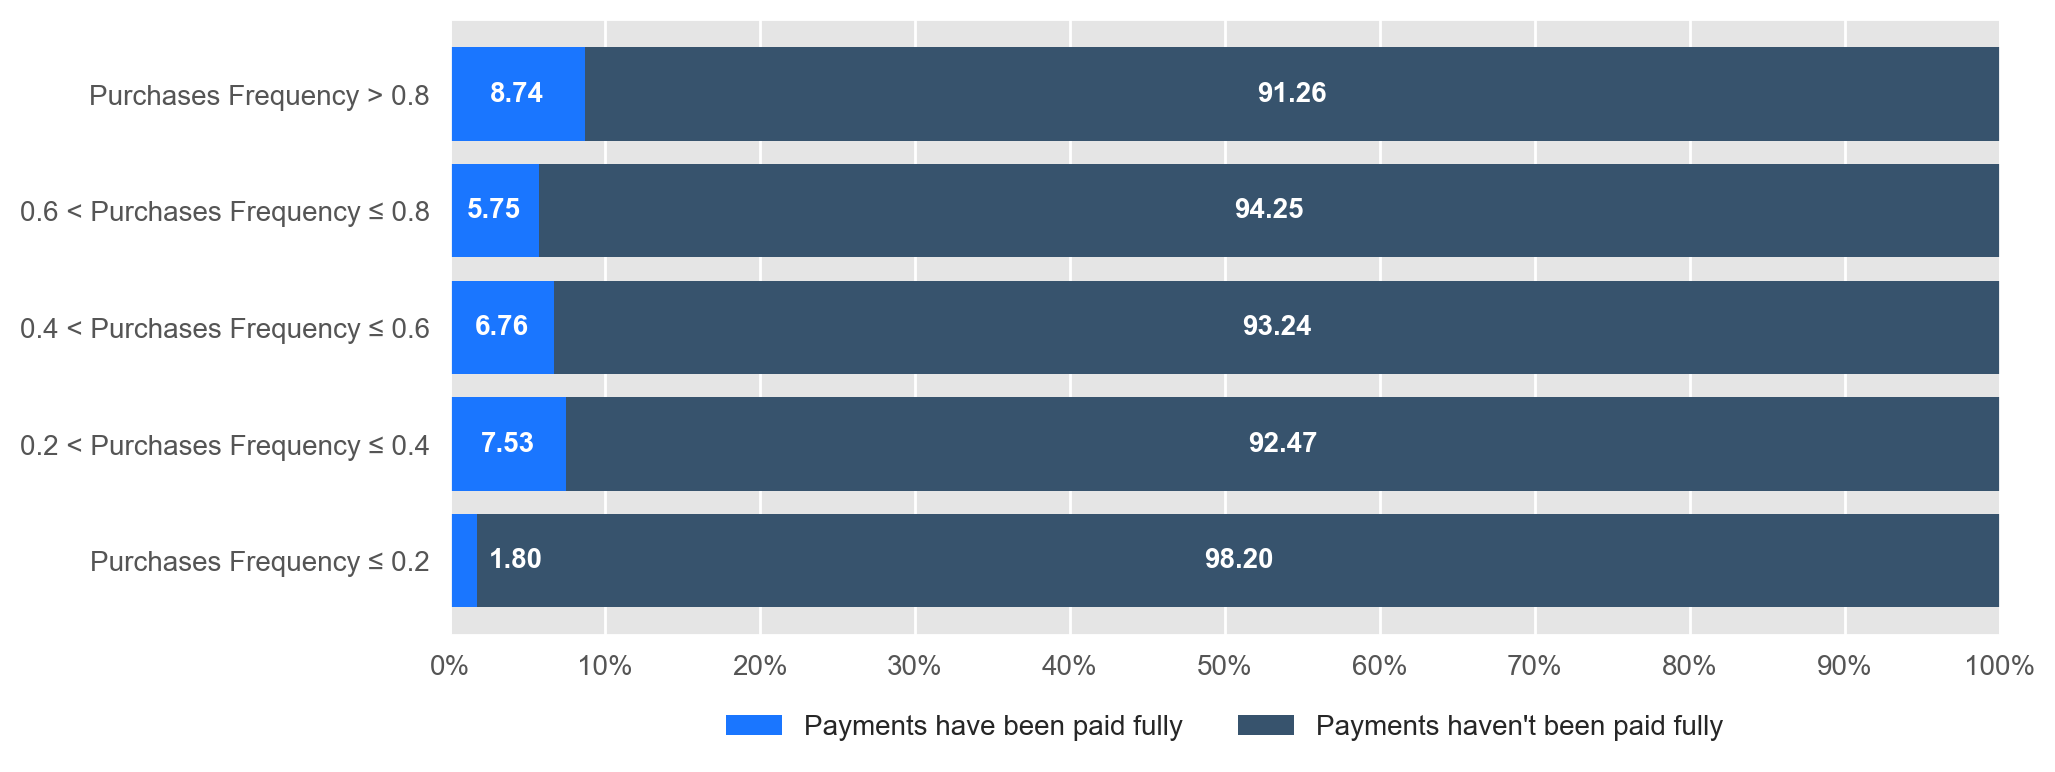

In [11]:
first = df[df["purchases_frequency"] <= 0.2]
second = df[(df["purchases_frequency"] > 0.2) & (df["purchases_frequency"] <= 0.4)]
third = df[(df["purchases_frequency"] > 0.4) & (df["purchases_frequency"] <= 0.6)]
fourth = df[(df["purchases_frequency"] > 0.6) & (df["purchases_frequency"] <= 0.8)]
fifth = df[df["purchases_frequency"] > 0.8]
labels = [
    "Purchases Frequency ≤ 0.2","0.2 < Purchases Frequency ≤ 0.4","0.4 < Purchases Frequency ≤ 0.6",
    "0.6 < Purchases Frequency ≤ 0.8","Purchases Frequency > 0.8"
]

prc_full_payment_is_1,prc_full_payment_not_1 = [],[]
for subset in [first,second,third,fourth,fifth]:
    prc_full_payment_is_1.append(len(subset[subset["prc_full_payment"] == 1]) / len(subset) * 100)
    prc_full_payment_not_1.append(len(subset[subset["prc_full_payment"] != 1]) / len(subset) * 100)

fig,ax = plt.subplots(figsize=(10,4),dpi=200)
n = 0

for label,prc_is_1,prc_not_1 in zip(labels,prc_full_payment_is_1,prc_full_payment_not_1):
    if n == 0:
        ax.barh(label,prc_is_1,color="#1a76ff",label="Payments have been paid fully")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d",label="Payments haven't been paid fully")
        n += 1
    else:
        ax.barh(label,prc_is_1,color="#1a76ff")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d")
for container in ax.containers[:1]:
    ax.bar_label(container,fmt="%.2f",padding=4,color="white",fontweight="bold")
for container in ax.containers[1:]:
    ax.bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax.set_xlim(xmax=100)
ax.set_xticks(np.arange(0,101,10),[f"{xtick}%" for xtick in np.arange(0,101,10)])
ax.legend(ncol=2,bbox_to_anchor=(0.5,-0.15),loc="center")

plt.show()

Tidak peduli seberapa sering pelanggan melakukan pembelian, hanya kurang dari 10% dari mereka yang telah membayar tagihan mereka sepenuhnya di setiap kelompok.

### Mencari Central Tendency dan Variability

**Central Tendency**

In [12]:
central_tendency = df.describe().T
central_tendency.reset_index().rename(
    columns={'index': 'Column'})

,Column,count,mean,std,min,25%,50%,75%,max
0,balance,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
1,balance_frequency,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
2,purchases,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
3,oneoff_purchases,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
4,installments_purchases,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
5,cash_advance,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
6,purchases_frequency,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
7,oneoff_purchases_frequency,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
8,purchases_installments_frequency,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
9,cash_advance_frequency,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


### Variability

In [13]:
# Ranges
range = df.describe().loc[['min', 'max']].T
range.rename(columns={'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Variance
variance = df.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance.rename(columns={0: 'Variance'}, inplace=True)

# Standard Deviation
std_deviation = df.select_dtypes(
    include=[np.number]).std(ddof=1).to_frame()
std_deviation.rename(columns={0: 'Standard Deviation'}, inplace=True)

# Quartil and IQR
quartil = df.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
quartil.index = ['Q1', 'Q2', 'Q3']
quartil = quartil.T
quartil['IQR'] = quartil['Q3'] - quartil['Q1']

# Coefficient of Variation
def coefficient_of_variation(column):
    return (np.std(column, ddof=1) / np.mean(column)) * 100
coef_variation = df.select_dtypes(
    include=[np.number]).apply(coefficient_of_variation)
coef_variation = pd.DataFrame({'Coefficient of Variation': coef_variation})

In [14]:
# Menggabungkan semua hasil
variability = pd.concat([range,
                         variance,
                         std_deviation,
                         quartil,
                         coef_variation], axis=1)

variability.reset_index().rename(columns={'index': 'Column'})

,Column,Minimum,Maximum,Variance,Standard Deviation,Q1,Q2,Q3,IQR,Coefficient of Variation
0,balance,0.000000,19043.13856,4.391419e+06,2095.571300,148.095189,916.855459,2105.195853,1957.100664,130.873015
1,balance_frequency,0.000000,1.00000,4.313799e-02,0.207697,0.909091,1.000000,1.000000,0.090909,23.205444
2,purchases,0.000000,49039.57000,4.696357e+06,2167.107984,43.367500,375.405000,1145.980000,1102.612500,211.335712
3,oneoff_purchases,0.000000,40761.25000,2.836893e+06,1684.307803,0.000000,44.995000,599.100000,599.100000,278.443346
4,installments_purchases,0.000000,22500.00000,8.413387e+05,917.245182,0.000000,94.785000,484.147500,484.147500,217.953969
5,cash_advance,0.000000,47137.21176,4.500585e+06,2121.458303,0.000000,0.000000,1132.385490,1132.385490,213.388708
6,purchases_frequency,0.000000,1.00000,1.610197e-01,0.401273,0.083333,0.500000,0.916667,0.833334,80.901742
7,oneoff_purchases_frequency,0.000000,1.00000,9.003217e-02,0.300054,0.000000,0.083333,0.333333,0.333333,145.721646
8,purchases_installments_frequency,0.000000,1.00000,1.584780e-01,0.398093,0.000000,0.166667,0.750000,0.750000,107.936818
9,cash_advance_frequency,0.000000,1.50000,4.071978e-02,0.201791,0.000000,0.000000,0.250000,0.250000,146.646268


# Korelasi Data

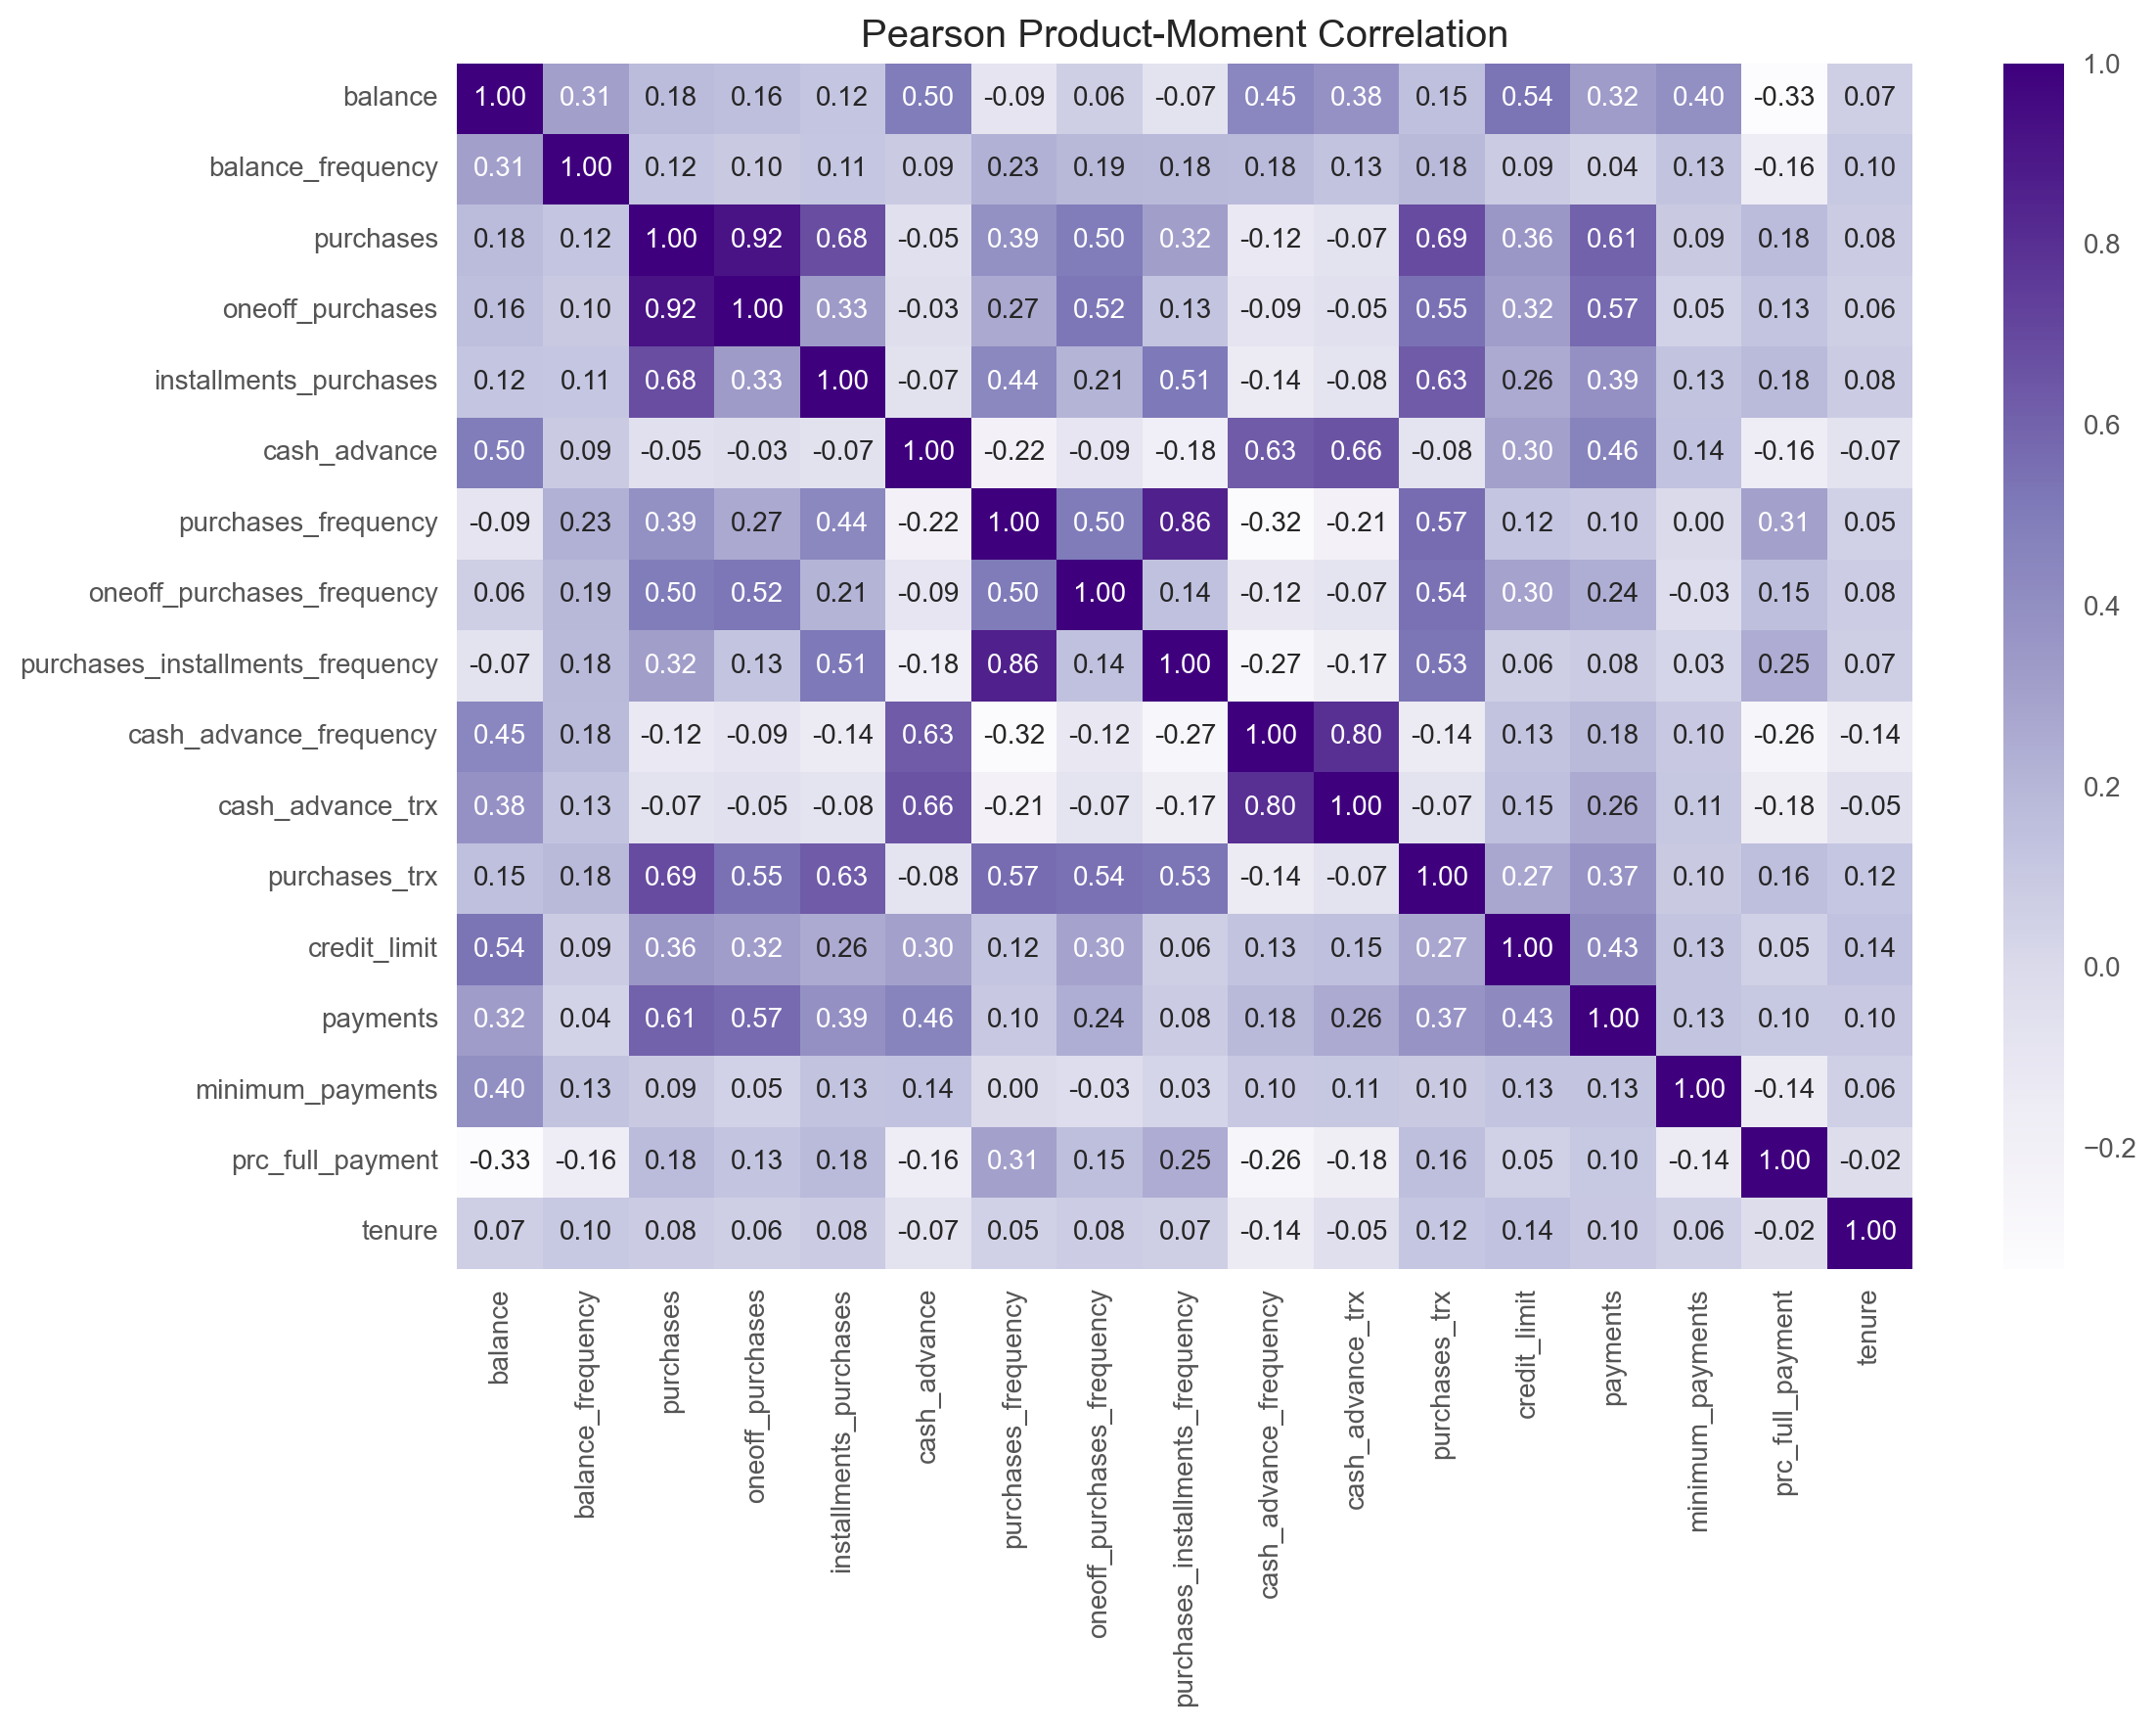

In [15]:
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
sns.heatmap(ax=ax,data=df.corr(),cmap="Purples",annot=True,fmt=".2f")
ax.set_title("Pearson Product-Moment Correlation")
plt.show()

Korelasi data mengukur sejauh mana hubungan antara dua variabel, dengan nilai berkisar antara -1 dan 1. Nilai positif menunjukkan hubungan positif, sedangkan nilai negatif menunjukkan hubungan negatif. Korelasi tidak menunjukkan sebab-akibat, hanya menggambarkan sejauh mana perubahan dalam satu variabel berkaitan dengan perubahan dalam variabel lainnya. Penggunaannya berguna untuk memahami hubungan variabel sebelum analisis lebih lanjut.

## Distribusi Data

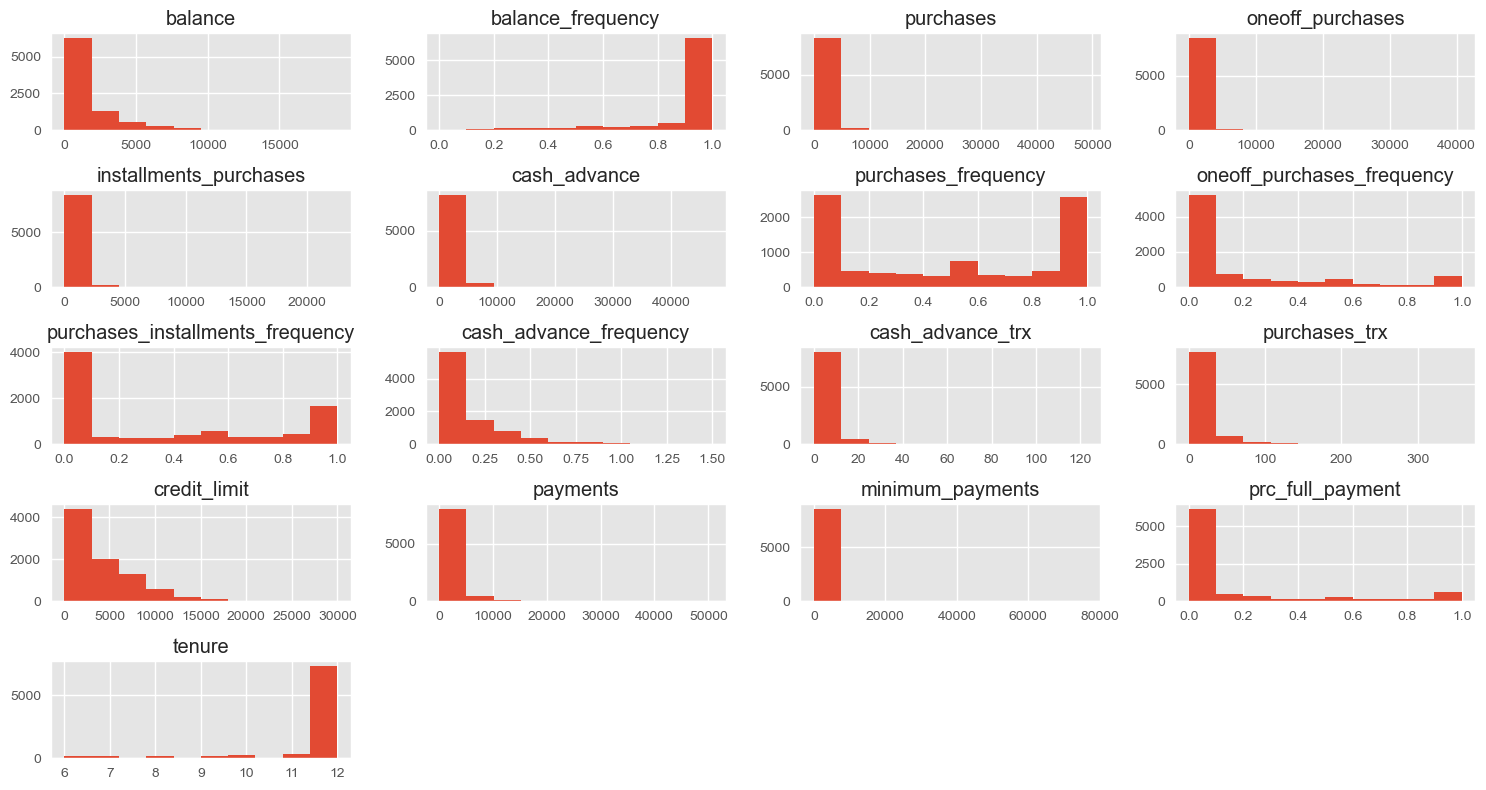

In [16]:
# Histogram
df.hist(figsize=(15, 8))
plt.title('Distribusi Data')
plt.tight_layout()
plt.show()

Histogram di atas mencerminkan sebaran data dari setiap kolom numerik dari dataset yang telah dibersihkan. Histogram tersebut memberikan pandangan tentang seberapa merata data tersebar dalam kisaran nilai tertentu. Hal itu juga berguna untuk melihat apakah variabel-variabel pada dataset berdistribusi normal.

# Data Preprocessing

## Standarisasi Data

Standarisasi data melibatkan transformasi data sehingga memiliki rata-rata 0 dan deviasi standar 1. Hal ini dilakukan dengan mengurangkan rata-rata dari setiap titik data dan membaginya dengan deviasi standar. Mensstandarkan data dapat membantu memastikan bahwa hasil analisis tidak dipengaruhi oleh skala variabel, karena analisis faktor dan pengelompokan k-means sensitif terhadap skala variabel.

In [17]:
#Normalisasi data dengan StandardScaler
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Akan dilakukan reduksi dimensi menggunakan metode Principal Component Analysis (PCA). PCA mengurangi jumlah dimensi dalam data sambil mempertahankan informasi yang relevan. 

In [18]:
# Applying PCA
X =df_norm

pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

## G-I. Models Definition, Models Training and Models Evaluation

In [19]:
# Membuat dataframe baru yakni df_pred untuk menyimpan dataset beserta prediksi dari masing-masing clustering models, dengan mengcopy df asli
df_pred = df.copy()

# Membuat fungsi untuk mengevaluasi clustering models nantinya
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print('Evaluate Clustering Quality')
    print('Davies-Bouldin Index:', db_index)
    print('Silhouette Score:', s_score)
    print('Calinski Harabasz Index:', ch_index)
    return db_index, s_score, ch_index

# Pendefinisian dan Pelatihan Model

Metode elbow dan metode silhouette adalah dua pendekatan yang berbeda yang dapat digunakan untuk menentukan jumlah klaster optimal dalam analisis pengelompokan k-means. Metode elbow berdasarkan pada jarak kuadrat dalam klaster (WCSS), sementara metode silhouette berdasarkan pada koefisien silhouette, yang mengukur kemiripan pengamatan dengan klaster tempatnya berada dibandingkan dengan klaster lainnya. Kita dapat menggunakan perpustakaan yellowbrick untuk membuat visualisasi.

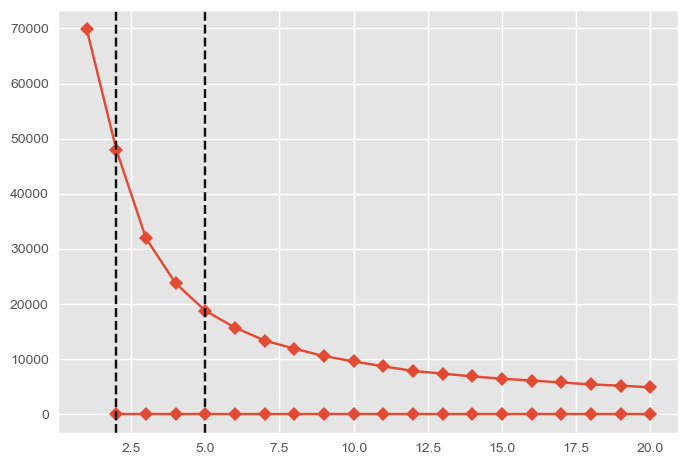

In [20]:
random_state = 42
start = 1
end = 20

scores,elbows_indexes,elbows_scores,methods = [],[],[],["distortion","silhouette"]

for method in methods:
    if method == "silhouette":
        start = 2
    
    kmeans_model = KMeans(init="k-means++",random_state=random_state)
    visualizer = KElbowVisualizer(kmeans_model,k=(start,end + 1),metric=method,timings=False)
    visualizer.fit(X)
    scores.append(visualizer.k_scores_)
    elbows_indexes.append(visualizer.elbow_value_)
    elbows_scores.append(visualizer.elbow_score_)

Langkah ini bersifat opsional. Karena visualisasi yang dibuat oleh perpustakaan yellowbrick kurang dapat disesuaikan, kita dapat membuat ulang visualisasi menggunakan perpustakaan matplotlib untuk membuatnya lebih baik

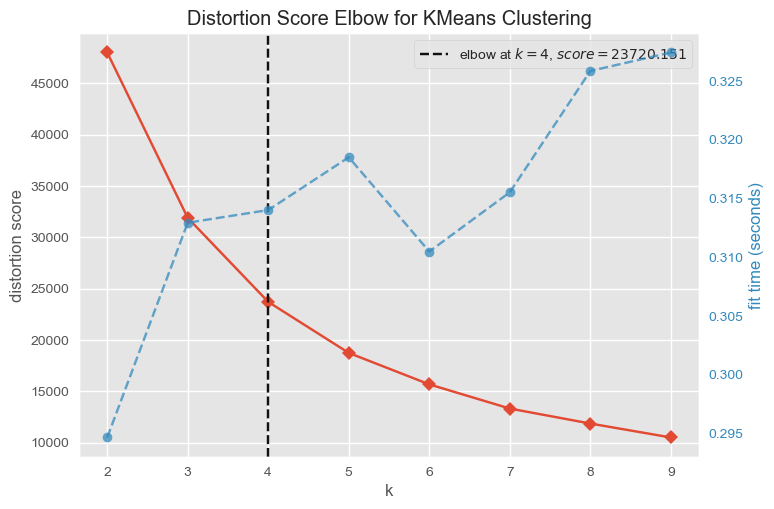

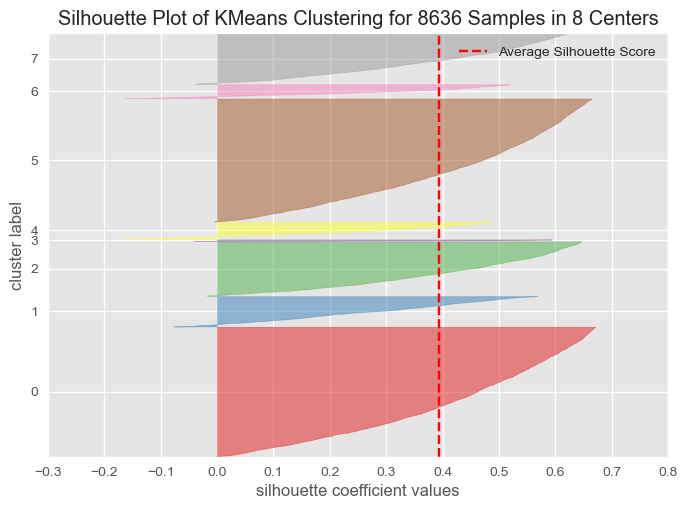

<Figure size 800x550 with 0 Axes>

In [21]:
# Elbow Method
model = KMeans(random_state=42, n_init=10)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(X)       
distortion_visualizer.show()  

# Silhouette Plot
model = KMeans(random_state=42, n_init=10)
silhouette_visualizer = SilhouetteVisualizer(model, k=(2, 10))

silhouette_visualizer.fit(X)
silhouette_visualizer.show()

plt.tight_layout()
plt.show()

Berdasarkan kedua plot di atas, kita mengetahui bahwa jumlah klaster yang optimal adalah 4. Oleh karena itu, mari membuat model k-means menggunakan 4 klaster.

In [22]:
kmeans = KMeans(n_clusters=4, random_state=28, max_iter=500, n_init=10)
y_kmeans = kmeans.fit_predict(X)

Dalam algoritma pengelompokan k-means, pusat-pusat klaster adalah titik-titik yang menentukan pusat dari setiap klaster. Titik-titik ini dipilih sedemikian rupa sehingga meminimalkan jarak antara titik-titik data dalam klaster dan pusat klaster. Algoritma k-means dimulai dengan memilih seperangkat pusat klaster awal, yang dapat dipilih secara acak atau ditentukan oleh pengguna. Algoritma kemudian secara iteratif memperbarui pusat klaster dengan menetapkan setiap titik data ke pusat klaster terdekat dan kemudian menghitung ulang pusat klaster sebagai rata-rata dari titik-titik data dalam klaster. Proses ini diulang sampai konvergensi, yaitu ketika pusat klaster berhenti berubah atau perbedaan antara jumlah kuadrat dalam klaster antara dua iterasi berturut-turut berada di bawah ambang tertentu.

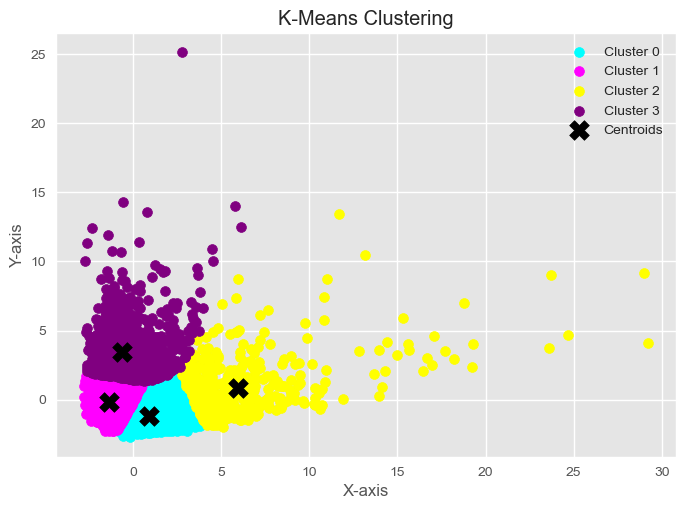

In [23]:
#Cluster labels K-Means
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='cyan', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='magenta', label='Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='purple', label='Cluster 3')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

Menetapkan titik data ke dalam klaster dan menghitung jarak antara titik data dan pusat-pusat klaster.

In [24]:
# Cluster labels K-Means
unique, counts = np.unique(y_kmeans, return_counts=True)
cluster_counts = dict(zip(unique, counts))
total_points = len(y_kmeans)

for cluster, count in cluster_counts.items():
    percentage = (count / total_points) * 100
    print(f"Cluster {cluster}: {percentage:.2f}%")

Cluster 0: 37.30%
Cluster 1: 43.35%
Cluster 2: 5.65%
Cluster 3: 13.70%


Memvisualisasikan jumlah dari point data dalam setiap cluster

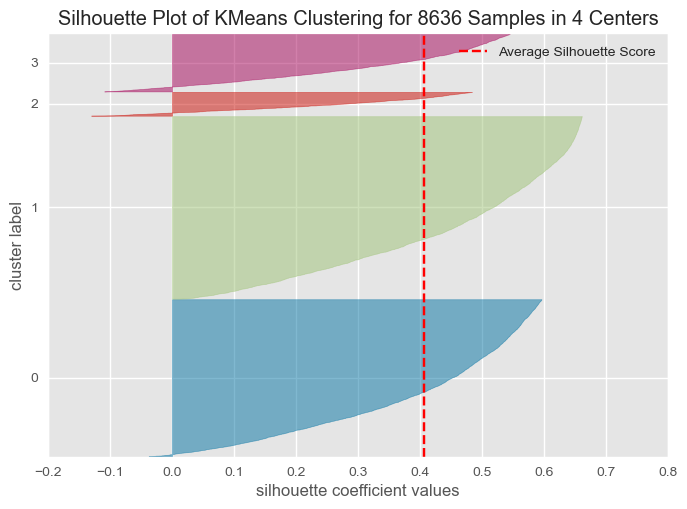

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8636 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# Visualisasi Silhoutte K-Means
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

Dari hasil silhouette plot diatas dapat dilihat :
* Nilai siluet setiap klaster berada di atas rata-rata, menunjukkan bahwa semua klaster optimal. Selain itu, dari fluktuasi ukuran plot siluet, semua klaster memiliki fluktuasi yang serupa. Namun, dari ketebalannya, klaster 0 dan 2 memiliki konsistensi yang lebih tebal dibandingkan klaster lainnya.
* Dibandingkan dengan klaster lainnya, klaster 0 dan 2 memiliki viskositas yang lebih tinggi. Hal ini karena sebagian besar titik data terletak di sudut kiri bawah dari scatter plot, dan jumlah pelanggan dalam kedua klaster tersebut lebih dari 35%.

In [26]:
# Evaluasi K-Means Clustering
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

Evaluate Clustering Quality
Davies-Bouldin Index: 0.804
Silhouette Score: 0.406
Calinski Harabasz Index: 5600.773


Berdasarkan nilai evaluasi yang didapat dapat disimpulkan :
* Nilai Davies-Bouldin Index sebesar 0.801 dapat dianggap sebagai hasil yang baik, menunjukkan adanya pemisahan yang baik antar klaster, namun masih memungkinkan adanya sedikit tumpang tindih.
* Nilai Silhouette Score sebesar 0.408 menunjukkan bahwa pengelompokan memiliki pemisahan yang cukup baik, namun masih ada sebagian data yang mungkin terletak cukup dekat dengan batas antar klaster.
* Nilai Calinski Harabasz Index sebesar 5823.676 menunjukkan bahwa klaster-klasternya memiliki kompakitas yang tinggi dan terpisah dengan jelas.

In [27]:
# Menyimpan hasil prediksi K-Means ke df_pred serta melihat count dari masing-masing cluster K-Means
df_pred['KMEANS_PREDICT'] = kmeans.labels_
df_pred['KMEANS_PREDICT'].value_counts().to_frame().reset_index()

,KMEANS_PREDICT,count
0,1,3744
1,0,3221
2,3,1183
3,2,488


Karena hasil evaluasi model K-Means clustering dirasa cukup tinggi, maka akan dilanjutkan ke clustering dataset

# Clustering The Dataset

In [28]:
# Menambahkan K-Means Prediction ke Dataframe
df['cluster_result'] = y_kmeans
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# Menghitung Mean Keseluruhan dari Dataframe tersebut
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

In [29]:
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

In [30]:
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()

In [31]:
# Menampilkan df_profile
df_profile

,Column Name,Metrics,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Overall
0,balance,mean,825.948547,1084.256891,3444.454302,4587.866785,1601.224893
1,balance_frequency,mean,0.928691,0.831801,0.988071,0.965146,0.895035
2,purchases,mean,1257.060025,227.486755,6981.080922,463.380135,1025.433874
3,oneoff_purchases,mean,634.743241,158.753413,4572.708135,298.872773,604.901438
4,installments_purchases,mean,622.525877,69.077751,2409.602295,164.611902,420.843533
5,cash_advance,mean,145.999637,642.897859,791.740094,4498.779574,994.175523
6,purchases_frequency,mean,0.862351,0.193452,0.953555,0.267290,0.496000
7,oneoff_purchases_frequency,mean,0.304877,0.076840,0.724925,0.130826,0.205909
8,purchases_installments_frequency,mean,0.675408,0.111424,0.809221,0.167007,0.368820
9,cash_advance_frequency,mean,0.030620,0.129263,0.086388,0.476417,0.137604


In [32]:
# Menampilkan df
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster_result
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Cluster 1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Cluster 3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Cluster 0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Cluster 1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,Cluster 1
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,Cluster 0
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,Cluster 1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,Cluster 1


# Inferensi Model

Membuat data baru dengan merandom data dengan masing-masing minimal dan maximal values pada masing-masing column.

In [33]:
# Daftar kolom yang akan dihasilkan secara acak
columns_to_randomize = [
    'balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
    'installments_purchases', 'cash_advance', 'purchases_frequency',
    'oneoff_purchases_frequency', 'purchases_installments_frequency',
    'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
    'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure'
]

# Dictionary untuk menyimpan daftar nilai acak untuk setiap kolom
randomized_values = {col: np.random.uniform(df[col].min(), df[col].max(), 5) for col in columns_to_randomize}

# Dapat juga menggunakan loop untuk menggantikan dictionary comprehension
# randomized_values = {}
# for col in columns_to_randomize:
#     randomized_values[col] = np.random.uniform(df[col].min(), df[col].max(), 5)

# Membuat DataFrame baru dengan nilai acak
randomized_df = pd.DataFrame(randomized_values)
randomized_df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,6949.451389,0.851121,27592.131628,14734.194790,5645.994824,8809.366549,0.912084,0.837266,0.689202,1.172868,59.987656,60.149578,7406.244858,31032.965432,6224.510525,0.109627,6.842411
1,9274.816188,0.122439,37790.210047,22426.208432,20094.863593,4727.482376,0.203809,0.561350,0.087502,0.828838,108.453834,184.669636,4776.970175,49356.829376,70944.046712,0.019286,10.466198
2,13108.393372,0.231829,23720.434841,34646.307826,9365.484979,250.180102,0.218532,0.185857,0.253799,0.130465,92.183125,196.002849,15066.346140,45665.019803,24592.300023,0.419207,10.438243
3,18792.530881,0.431301,16048.072660,18435.797650,13912.857243,27050.556669,0.543285,0.830110,0.569721,0.509049,87.481218,156.197386,19528.028392,50406.478904,31538.573710,0.099873,10.920891
4,15094.209090,0.734917,6601.379100,22878.015279,13712.575480,6801.969269,0.107935,0.957984,0.122743,0.351491,71.626045,128.809263,29326.352062,49466.170040,50230.669691,0.822829,10.453830


In [34]:
# Implementing K-Means
y_pred = kmeans.fit_predict(randomized_df)
print("Cluster : ",y_pred)

Cluster :  [0 2 3 1 1]


# Kesimpulan

Proyek ini bertujuan untuk membangun dan mengevaluasi performa metode K-Means Clustering dalam mengelompokkan pengguna kartu kredit berdasarkan perilaku penggunaan kartu kredit. Dataset yang digunakan berasal dari rekam pengguna kartu kredit. Setelah melakukan pengolahan data dan analisis, berikut adalah kesimpulan yang diperoleh:

*   Model K-Means Clustering memberikan hasil yang baik dalam mengelompokkan pengguna kartu kredit berdasarkan pola perilaku penggunaan kartu kredit.
*   Penggunaan K-Means Clustering menghasilkan pembagian pengguna kartu kredit ke dalam kelompok-kelompok yang cukup jelas, dengan interpretasi masing-masing kelompok dapat dianalisis lebih lanjut.
*   Analisis elbow method dan silhouette method digunakan untuk menentukan jumlah klaster optimal. Hasilnya menunjukkan bahwa jumlah klaster yang optimal adalah 4 klaster, menandakan struktur kelompok yang paling baik merepresentasikan pola dalam data perilaku penggunaan kartu kredit tersebut.
*   Dalam konteks dataset ini, K-Means Clustering memberikan wawasan yang berharga tentang bagaimana pengguna kartu kredit dapat dikelompokkan berdasarkan kebiasaan penggunaan kartu kredit mereka.
*   Evaluasi performa model menggunakan metrik seperti silhouette score memberikan pemahaman yang lebih baik tentang seberapa baik model ini mengelompokkan pengguna kartu kredit.
*   Interpretasi hasil dari masing-masing klaster dapat memberikan informasi tambahan tentang profil pengguna kartu kredit atau karakteristik perilaku pengguna tertentu yang dapat diidentifikasi dalam konteks industri kartu kredit.

Dengan adanya hasil ini, proyek ini memberikan pemahaman lebih lanjut tentang potensi metode K-Means Clustering dalam mengelompokkan pengguna kartu kredit berdasarkan perilaku penggunaan kartu kredit. Hasil ini dapat menjadi dasar untuk pengembangan analisis lebih lanjut atau penerapan praktis dalam industri kartu kredit, membantu perusahaan untuk memahami kebutuhan dan preferensi pelanggan dengan lebih baik.